# **Machine Learning Models Hyper-Parameter Tuning**

- This project helps us to know the benefits of Hyper-Parameter tuning

- Hyper-Parameter tuning is basically tweaking the parameters of particular models in a way that, the model produces the most accurate results for our particular data set



## Data Preperation

- For this project we have choosed a very real cause of problem, **Insurance Claim Frauds** data set from kaggle

- We have downloaded a already almost cleaned version of the dataset, thus saving us some work

- To have the best dataset possible, we should perform two important steps 1) Data Cleaning, 2) Exploratory Data Analysis

- Of the two steps, first one isnt that important, because we have already downloaded a clean data set

- We will perform adequate EDA for our current data set, maximizing our understanding of the data set, and improving the ML Models accuracy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
#Change this directory as per your convenience
df = pd.read_csv('/content/drive/MyDrive/Hackathon_Masai/insurance_claim.csv')
df.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


- Following is the cleaned data set that is being used to compare model performance in this project

### Exploratory Data Analysis

- Exploratory data analysis allows us to perform thorough study on the data using different methods and visualizations

- Main steps in EDA are :
  1.   Handling Missing Values
  2.   Handling Outliers
  3.   Encoding
  4.   Standardization Scaling



#### 1) Handling Missing Values

Here we are identifying the columns that contains missing values, and the values are handled using median and mode techniques

**Using heatmap to show missing values**

In [ ]:
# visualizing missing values by heatmap
sns.heatmap(df.isnull())
plt.show()

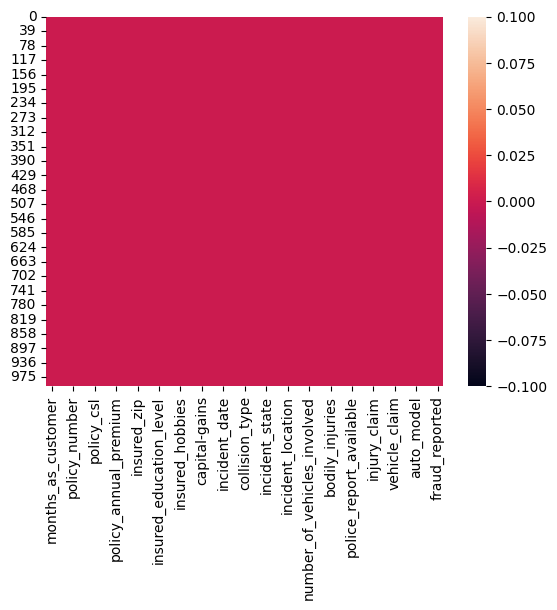

**Using Bar Graph to show columns with missing values**

In [ ]:
missing_values = (df.isnull().sum()/df.shape[0])*100
# converting the percentage of missing values into a dataframe to see all columns
missing_values = (df.isnull().sum()/df.shape[0])*100
print(type(missing_values))
missing_values_df= pd.DataFrame(missing_values, columns=["percentage_missing"]).reset_index()
#naming columns
missing_values_df.columns = ['column_name', 'percentage_missing']
missing_values_df.T
# use pivot to convert the column names into a column
sns.barplot(x='column_name', y='percentage_missing', data = missing_values_df)

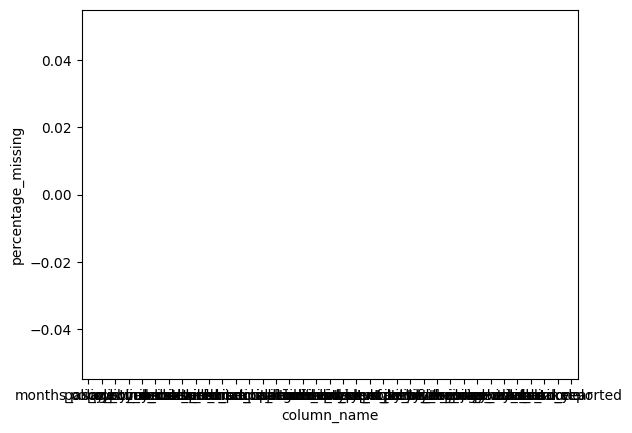

- *In the heatmap, we see a complete 0 plot, which means there are no missing values*
- *Similarly in the bar graph plot, we can see there are no columns, denoting that there are no missing values*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())

# Handle missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


# Verify that missing values have been handled:
print(df.isnull().sum())


Our data is already cleaned, so we wont find much of a difference in this step

Here after handling the missing values we can see that none of the columns have any null values, which moves us to the next step

#### 2) Handling Outliers

* Outliers are data entries that are very off from the median and the central tendency of the rest of the data

* We need to handle these outlier entries because some ML Models can be very sensitive to outliers thus giving us less accurate or even random outputs

* So handling outliers is a very crucial step before preprocessing and training the model

**Identifying and visualizing the outliers in each columns :**

In [ ]:
sns.set(style="whitegrid")

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through numeric columns and plot only if outliers exist
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], color='pink')
        plt.title(f'Outliers in {col} (Count: {len(outliers)})')
        plt.xlabel(col)
        plt.show()
        print('\n')

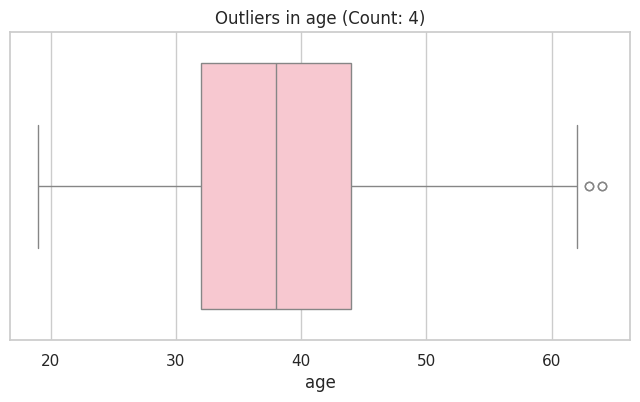

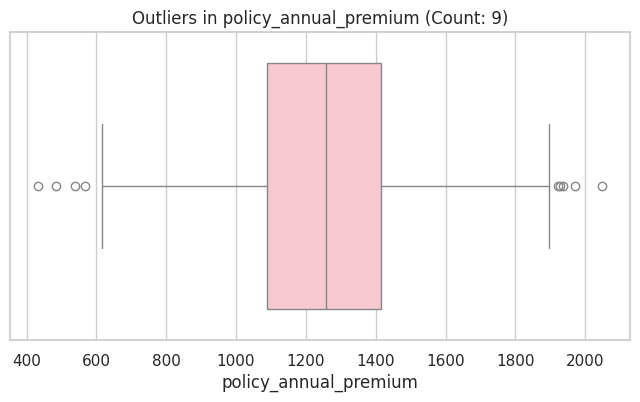

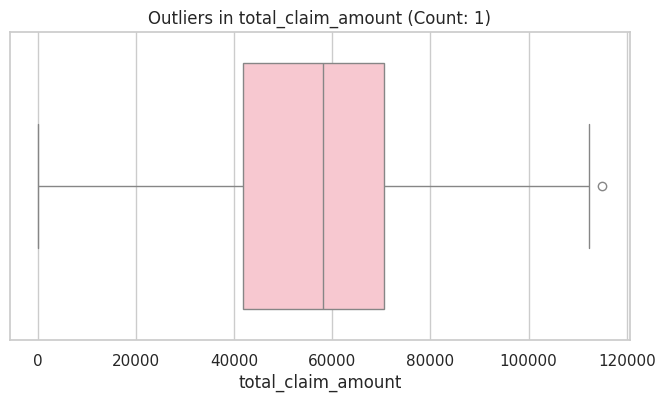

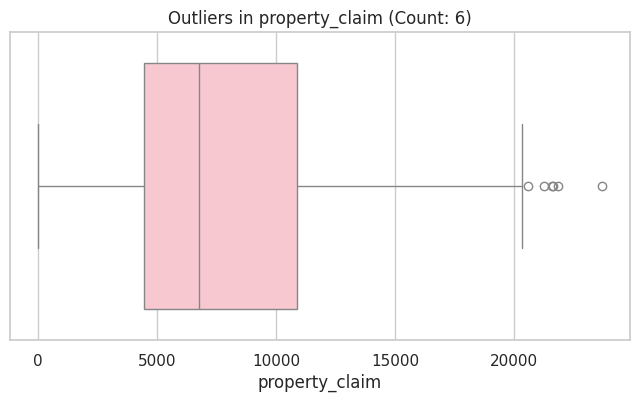

* Following are the two most commonly used methods to handle the outliers

  1. IQR : Use for skewed data or when you want to remove extreme values
      - Q1-1.5IQR>=Outlier>=Q3+1.5IQR
      - df['col'].quantile(0.25)
  2. Z-score: use when data is normally distributed
      - 99.72 CI; mu-3sigma>=Outlier>=mu+3sigma

**Removing the outliers :**

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Cap outliers to lower and upper bounds
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the respective bound
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

*After running this coded, we can observe that running the code that detects the outliers wouldnt produce any outputs, because the outliers has been handled*

#### 3) Encoding

Encoding commonly used in preprocessing steps such as\
scaling, encoding, and imputing missing values.
- fit: Computes the necessary statistics or parameters from the data (e.g., mean and standard deviation for scaling).
- transform: Applies the transformation to the data using the computed parameters.

In [ ]:
# Handle non-numeric columns
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y.astype(str))

#Preprocessing for better converging
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y.astype(str))

*To Note : This code wont work standing alone, Its displayed here for understanding*

#### 4) Standardization Scaling

Standardization comprises of the following features:

- convert to mean=0 and std=var=1
- Xnew=(Xi-mean)/std
- from sklearn.preprocessing import standardscaler

*The following code shows how the standard scaling applies for each of the seperate columns*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Original data
original_data = df[numeric_cols]

# Scaled data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(original_data), columns=numeric_cols)

# Plotting original vs scaled for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(12, 4))

    # Original
    plt.subplot(1, 2, 1)
    sns.histplot(original_data[col], kde=True, color='skyblue')
    plt.title(f'Original - {col}')

    # Scaled
    plt.subplot(1, 2, 2)
    sns.histplot(scaled_data[col], kde=True, color='salmon')
    plt.title(f'Standard Scaled - {col}')

    plt.tight_layout()
    plt.show()
    print("\n")


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

*To Note : This code will not work standing alone*

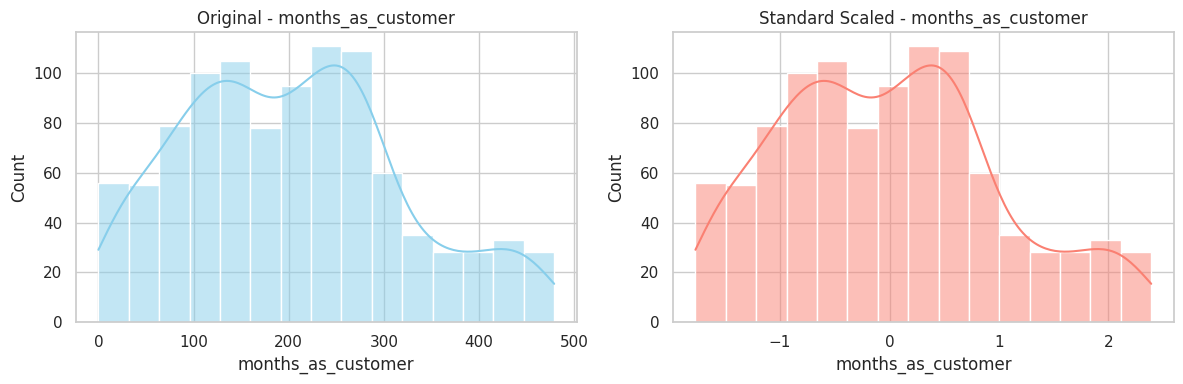

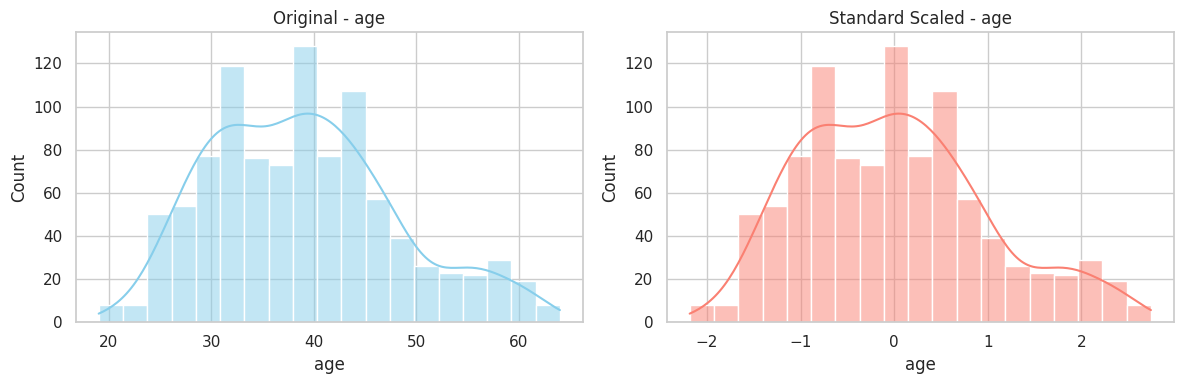



**Using graph plotting we can see the difference between scaled and un-scaled dataset columns**

### Training and Testing Split

- (Train Test split is required only for supervised learning (regression or classification) not for unsupervised learning(clustering or association) )
What: In absence of extra data, we split our present data into two datasets one is training and another for testing its performance\
Why: It's like an exam we give 8 Q (train) to student and ask another 2Q (test) in exam to check whether it performs well or not. If we train him on all 10 Q and in test we give him same 10Q (on the basis of rattafication he will answer all quetion with 100% accuracy) will not be able to check his understanding or how he will perform to other real life problems.

- Here we are splitting our data in a 80/20 split rule

- Benefits:
  1. Model evaluation: evaluate the performance of your model on unseen data, which helps in assessing how well the model generalizes to new data.
  2. Prevent Overfitting:
  3. Hyperparameter Tuning: It provides a way to tune hyperparameters and select the best model configuration without biasing the evaluation metrics.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

#splitting the dataset into x and y, also splitting them into 80/20 portions for training the model, and to test the model respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

After preprocessing the dataset and selecting the target column, we split the data into training and testing sets using an 80-20 ratio. This helps us evaluate model performance on unseen data and avoid overfitting.

To ensure that all features contribute equally to model learning and to help algorithms converge faster, we applied StandardScaler to scale the feature values. Standardization transforms the data so that each feature has a mean of 0 and a standard deviation of 1, which is especially important for models that rely on distance or gradient-based optimization.

**We trained 5 classification models using their default parameters:**

- **Logistic Regression :**

    A simple yet powerful linear model used for binary and multiclass classification. It models the probability that a given input point belongs to a particular class using the logistic function. It’s fast, interpretable, and works well when the relationship between features and the target is approximately linear.

- **Decision Tree Classifier :**

    A tree-based model that splits the data into branches based on feature values to reach a decision. It’s intuitive and can handle both numerical and categorical data, but it’s prone to overfitting unless pruned.

- **Random Forest Classifier :**

    An ensemble of decision trees where each tree is trained on a random subset of the data and features. It combines the predictions of multiple trees to improve accuracy and reduce overfitting. It performs well even on large datasets and captures non-linear relationships.

- **Gradient Boosting Classifier :**

    Another tree-based ensemble method, but unlike Random Forest, it builds trees sequentially. Each new tree corrects the errors of the previous one. It’s highly accurate and effective on structured/tabular data, though it can be sensitive to hyperparameters.

- **Support Vector Machine (SVM) :**

    A powerful algorithm that finds the optimal hyperplane that separates different classes in the feature space. It works well for both linear and non-linear classification problems, especially when the number of features is high. However, it can be computationally expensive on large datasets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)

**Why these five models?**

*These models were chosen because they represent a diverse set of algorithmic approaches and are commonly used as baseline models in most classification tasks. They are also well-supported by scikit-learn and work well across different types of datasets. Together, they offer a balanced comparison between simplicity, interpretability, and predictive power.*


## Model Evaluation

#### Core Metrics

Once all classification models were trained on the training dataset, we evaluated their performance on the test dataset using four core metrics:

🔹 **Accuracy :**

Accuracy is the ratio of correctly predicted instances to the total number of predictions. While it gives a quick overview, it can be misleading for imbalanced datasets (e.g., when fraudulent claims are much rarer than legitimate ones).

🔹 **Precision :**

Precision answers: "Of all the positive predictions the model made, how many were actually correct?"
This is especially useful in scenarios where false positives are costly, like flagging legitimate claims as fraudulent

🔹 **Recall :**

Recall asks: "Of all actual positive cases, how many did the model correctly identify?"
High recall is vital when missing a true positive is expensive, like failing to detect fraud or accidents.

🔹 **F1 Score :**

The F1 Score is the harmonic mean of Precision and Recall. It's a balanced metric that handles both false positives and false negatives, making it a good overall performance indicator.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("-" * 30)

#### ROC AUC Plotting

**ROC Area Under Curve :**

The ROC AUC (Receiver Operating Characteristic - Area Under Curve) is a powerful metric to evaluate the performance of classification models, especially when dealing with imbalanced datasets.

The ROC Curve plots the True Positive Rate (Recall) against the False Positive Rate at different classification thresholds. It visually shows how well the model can separate the classes.
The AUC (Area Under the Curve) value summarizes this plot as a single number between 0 and 1:

- 1.0 means perfect classification.

- 0.5 means the model is no better than random guessing.

A model with a higher AUC is generally better at distinguishing between classes.

In this notebook, ROC AUC Curves are generated for each tuned model using either predicted probabilities (for models like Logistic Regression and Random Forest) or decision scores (for models like SVM). Only models that support these methods will have their curves plotted.

This helps us visualize:

- Which models are confidently distinguishing classes,

- And which ones might be overfitting or underperforming despite good accuracy.

In [ ]:
# ROC AUC Section
st.subheader("📈 ROC AUC Curves")

# Binarize the output for binary ROC plotting
y_bin = label_binarize(y_test, classes=np.unique(y_test))
is_binary = y_bin.shape[1] == 1

# Adjust for binary class
if is_binary:
    y_bin = np.hstack((1 - y_bin, y_bin))

plt.figure(figsize=(10, 6))

for name, model in models.items():
    try:
        # Get tuned model from GridSearchCV
        grid = GridSearchCV(model, param_grids[name], cv=3, n_jobs=-1)
        grid.fit(X_train, y_train)

        if hasattr(grid, "predict_proba"):
            probs = grid.predict_proba(X_test)
            fpr, tpr, _ = roc_curve(y_bin[:, 1], probs[:, 1])
        elif hasattr(grid, "decision_function"):
            scores = grid.decision_function(X_test)
            fpr, tpr, _ = roc_curve(y_bin[:, 1], scores)
        else:
            continue

        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    except Exception as e:
        st.warning(f"ROC Curve could not be generated for {name}: {str(e)}")

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves (Tuned Models)")
plt.legend(loc="lower right")
st.pyplot(plt)

*To Note : This code might not work standing alone*

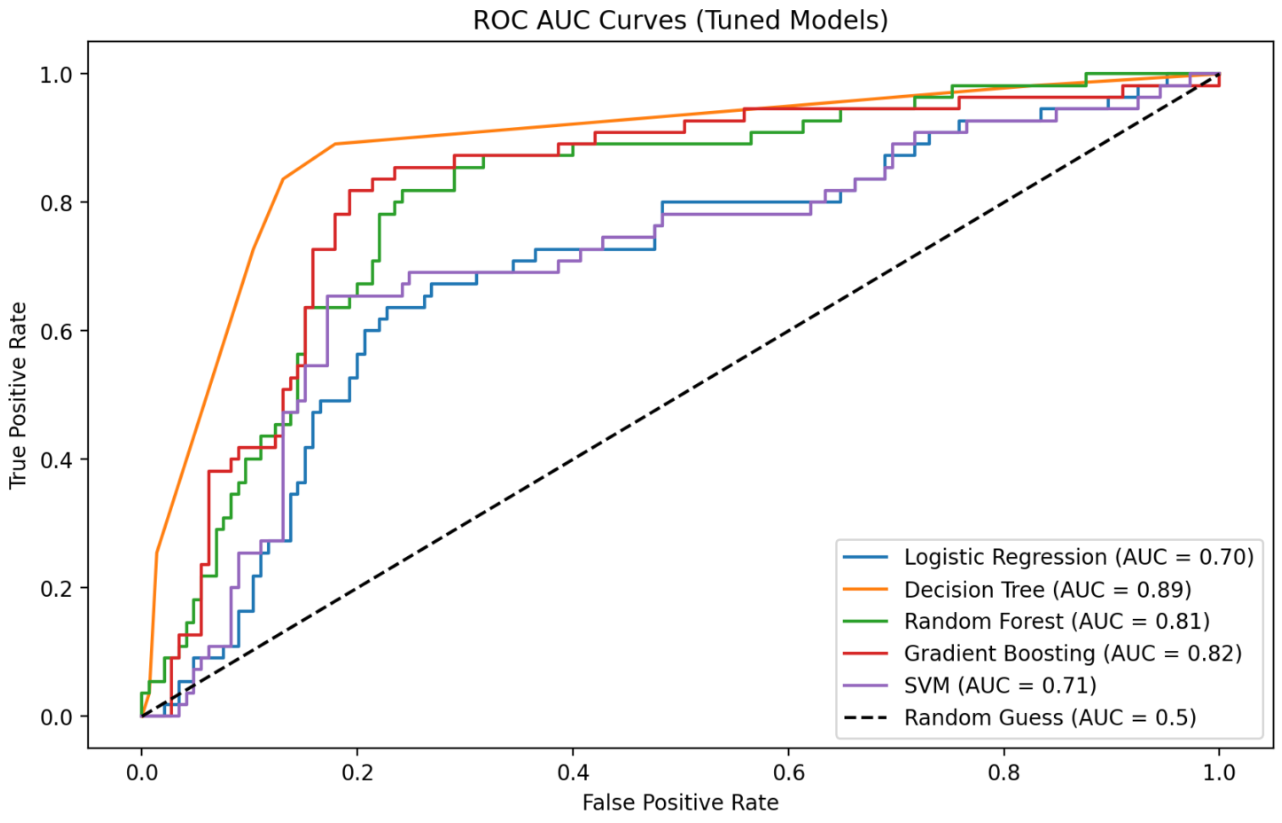

*As we can see our models are performing well into the True Positive Rate Section, away from the x=y line, which shows our models are giving accurate results*

## Hyper-Parameter Tuning

After training the models with their default settings, we applied hyperparameter tuning to optimize their performance. Machine learning models come with parameters that control how they learn — for example, how deep a tree can grow, how much regularization to apply, or how many estimators to use.

These are called hyperparameters, and tuning them can significantly improve model performance.

**GridSearchCV :**

*We used GridSearchCV, a powerful technique that Searches exhaustively through a manually specified grid of hyperparameter values Uses cross-validation to evaluate each parameter combination Selects the one with the best cross-validation score*

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grids = {
            "Logistic Regression": {
                'C': [0.01, 0.1, 1],
                'solver': ['liblinear']
            },
            "Decision Tree": {
                'max_depth': [3, 5, 10, None],
                'min_samples_split': [2, 5,]
            },
            "Random Forest": {
                'n_estimators': [50, 100],
                'max_depth': [5, 10],
                'min_samples_split': [2, 5]
            },
            "Gradient Boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 1.0],
                'min_samples_split': [2, 10]
            },
            "SVM": {
                'C': [0.1, 1],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale']
            }
        }

for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred_tuned = grid.predict(X_test)
    print(f"Tuned {name} F1 Score:", f1_score(y_test, y_pred_tuned, average='weighted'))


*Let us visualize the improvements in the models, by comparing the before and after of the models, after implementing Hyper-Parameter Tuning.*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results list to a DataFrame if not already
results_df = pd.DataFrame(results)

# Plotting performance comparison
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=results_df, x="Model", y=metric, hue="Type")
    plt.title(f"{metric} Comparison: Default vs Tuned Models")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title="Model Type")
    plt.tight_layout()
    plt.show()


*To Note : This Code May Not work standing alone*

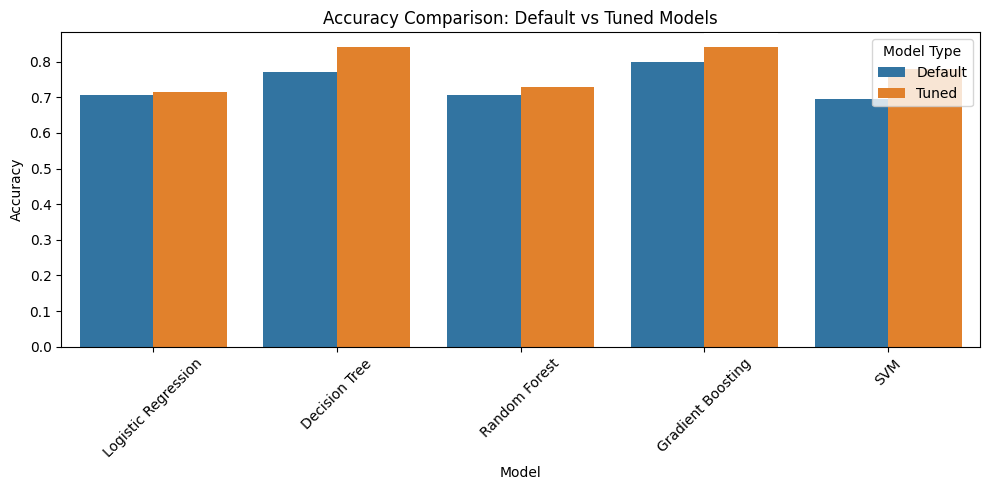

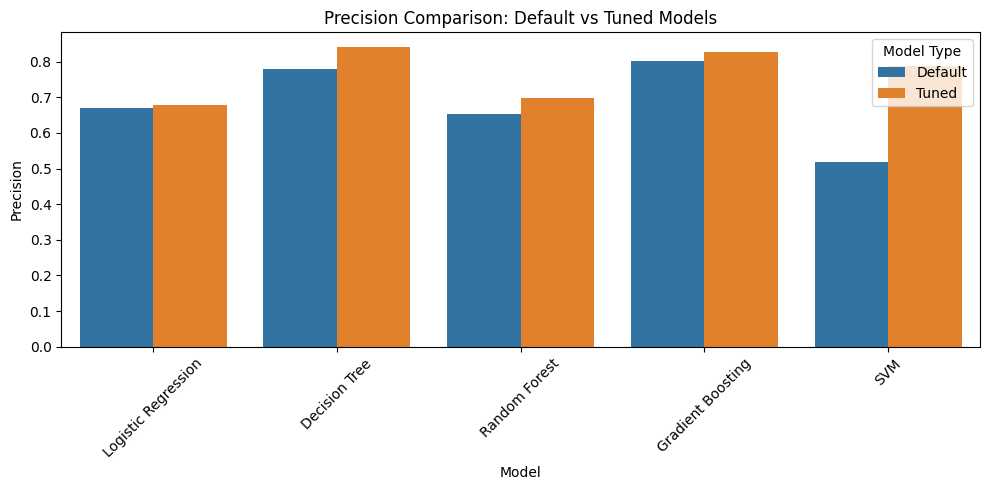

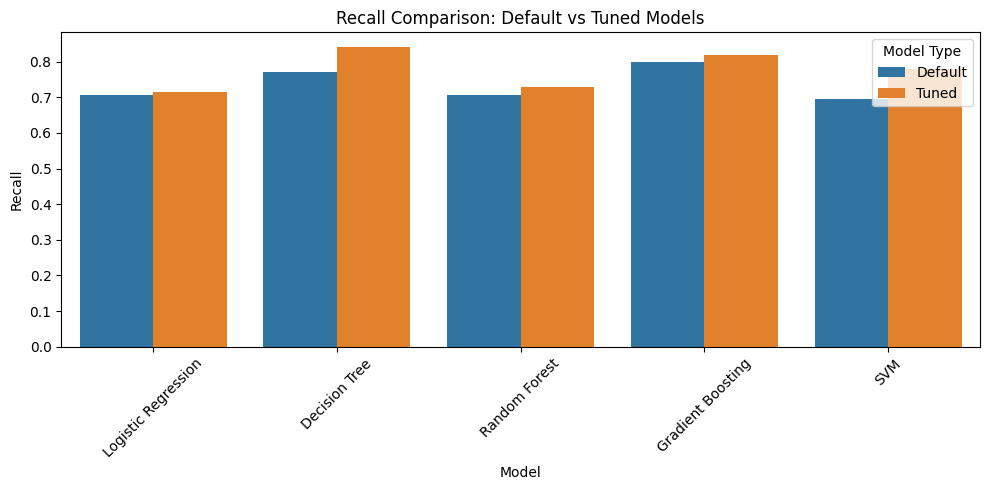

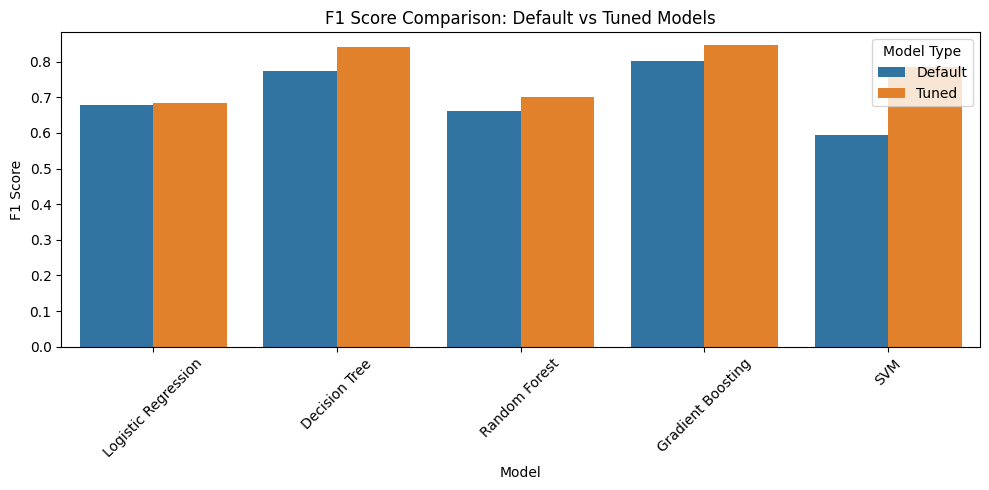

## Dashboard Creation

- To present all the model comparison results in a clear and interactive way, we created a simple but effective dashboard using Streamlit, a Python-based library for building lightweight web apps. The goal of this dashboard is to allow users—especially those who may not be familiar with code—to upload a dataset, select a target column, and instantly get visual insights into how various machine learning models perform on their data.

- Once a CSV file is uploaded, the dashboard automatically reads the dataset, drops any columns with missing values, and shows a quick preview of the cleaned data. Users can then select the target variable they want to predict. Behind the scenes, the features are encoded if needed, standardized for better convergence, and split into training and testing sets.

- After pressing the “Run Model Comparison” button, five different classification models—Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and Support Vector Machine—are trained on the data. Each model is evaluated in both its default form and after hyperparameter tuning using GridSearchCV. For each model variant, the dashboard calculates key performance metrics: Accuracy, Precision, Recall, and F1 Score.

**Features:**

- Upload custom datasets (CSV)
- Select the target column
- Automatic preprocessing
- Run default and hyperparameter-tuned models
- Compare results using tables and visual bar plots
- Download results as a CSV

In [ ]:
st.title("📊 Classification Model Comparator")
uploaded_file = st.file_uploader("Upload a CSV file", type=["csv"])
...
st.subheader("📈 Model Comparison Table")
st.dataframe(results_df)

st.subheader("📊 Visualization")
metric = st.selectbox("Select a metric to compare", ["Accuracy", "Precision", "Recall", "F1 Score"])
sns.barplot(data=results_df, x="Model", y=metric, hue="Type")

*To Note : This code may not work standing alone, Also you need streamlit to be run from the system CMD, for it to work using the **(streamlit run)** command*

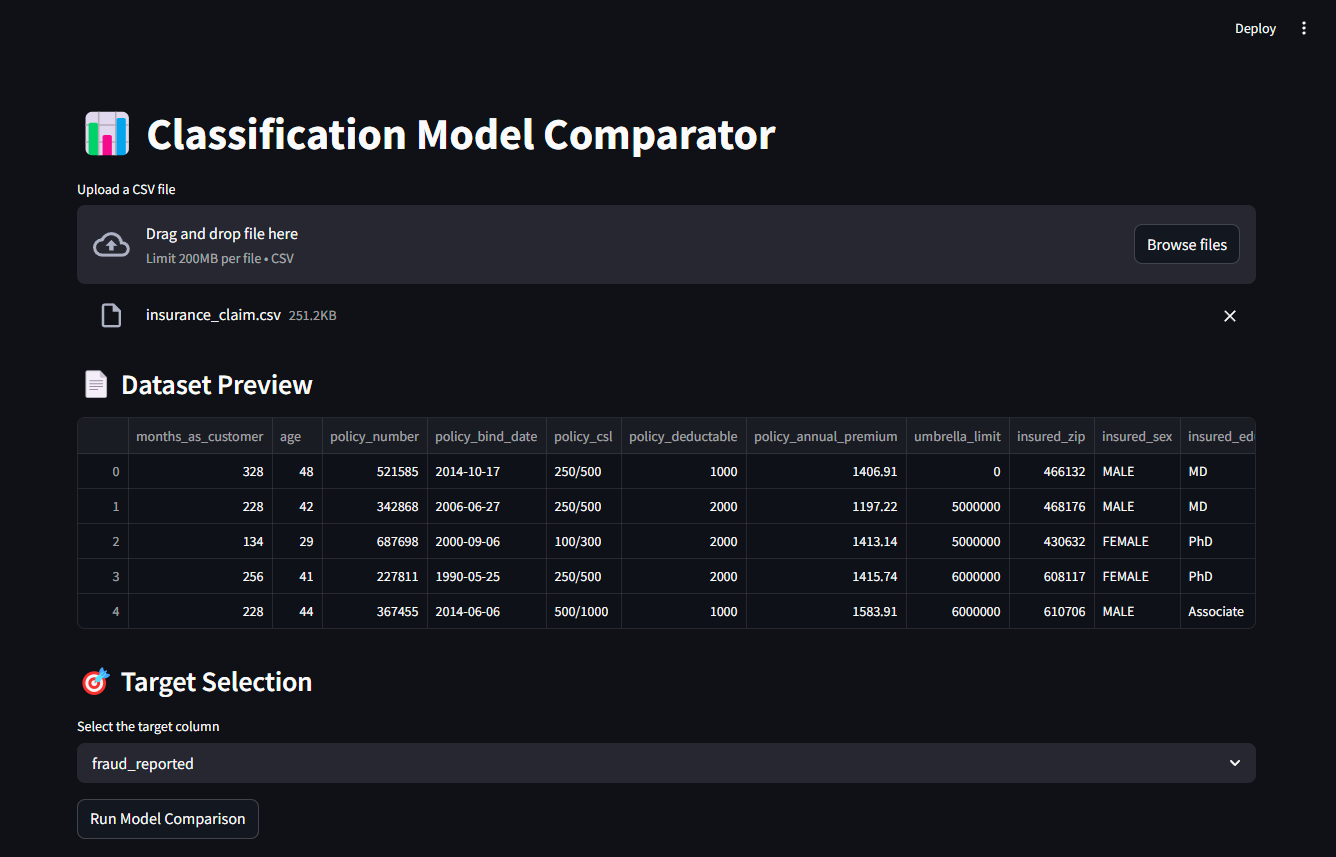

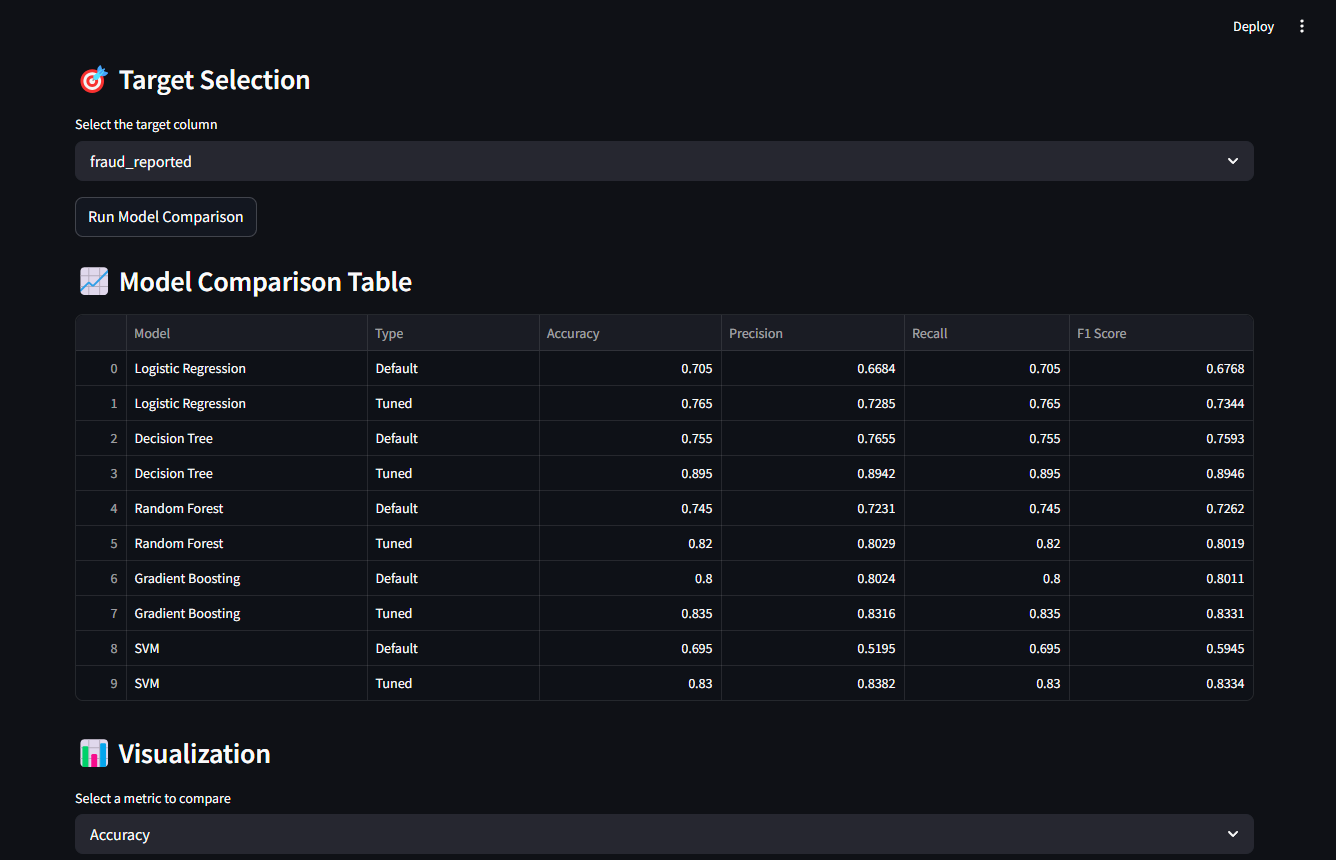

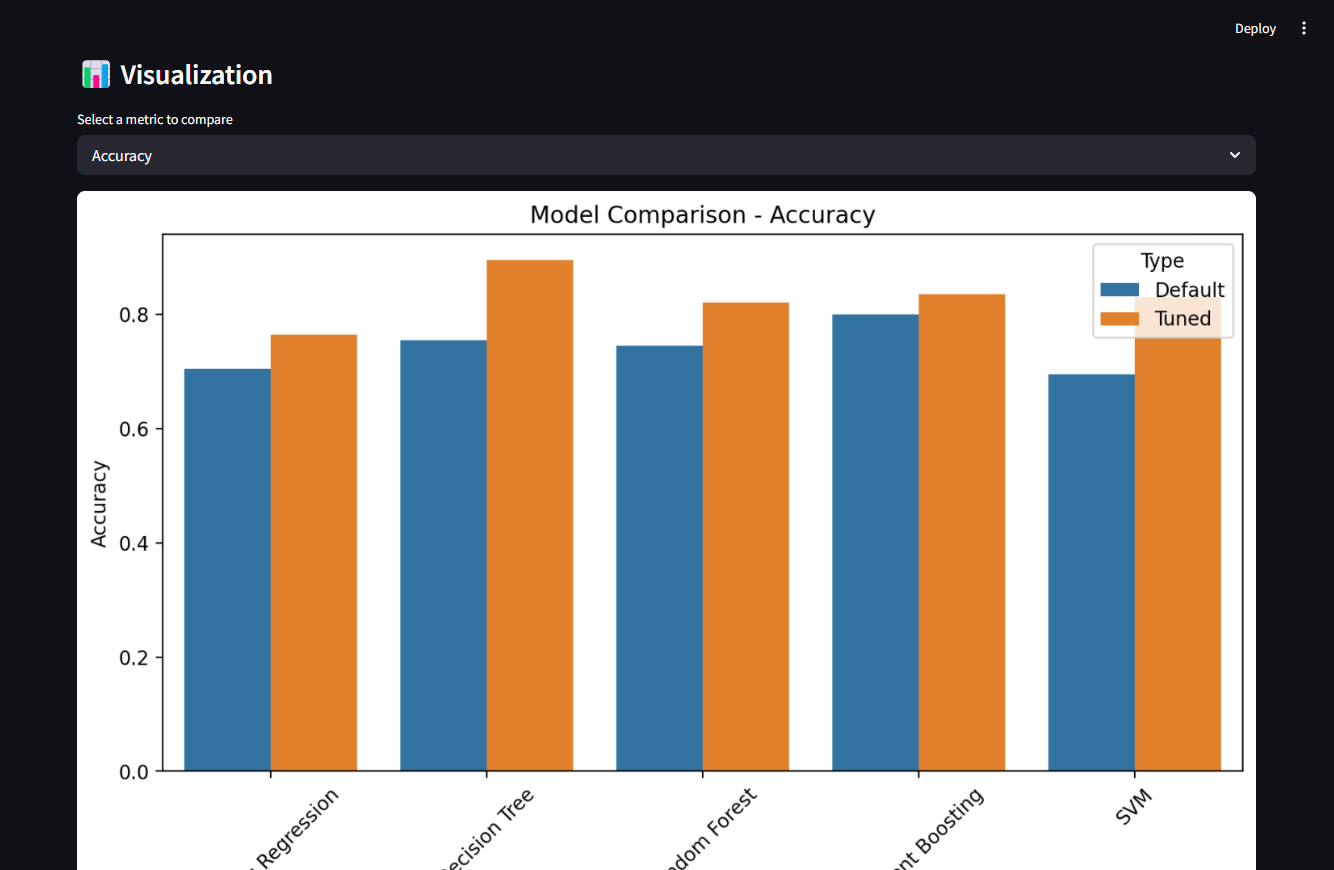

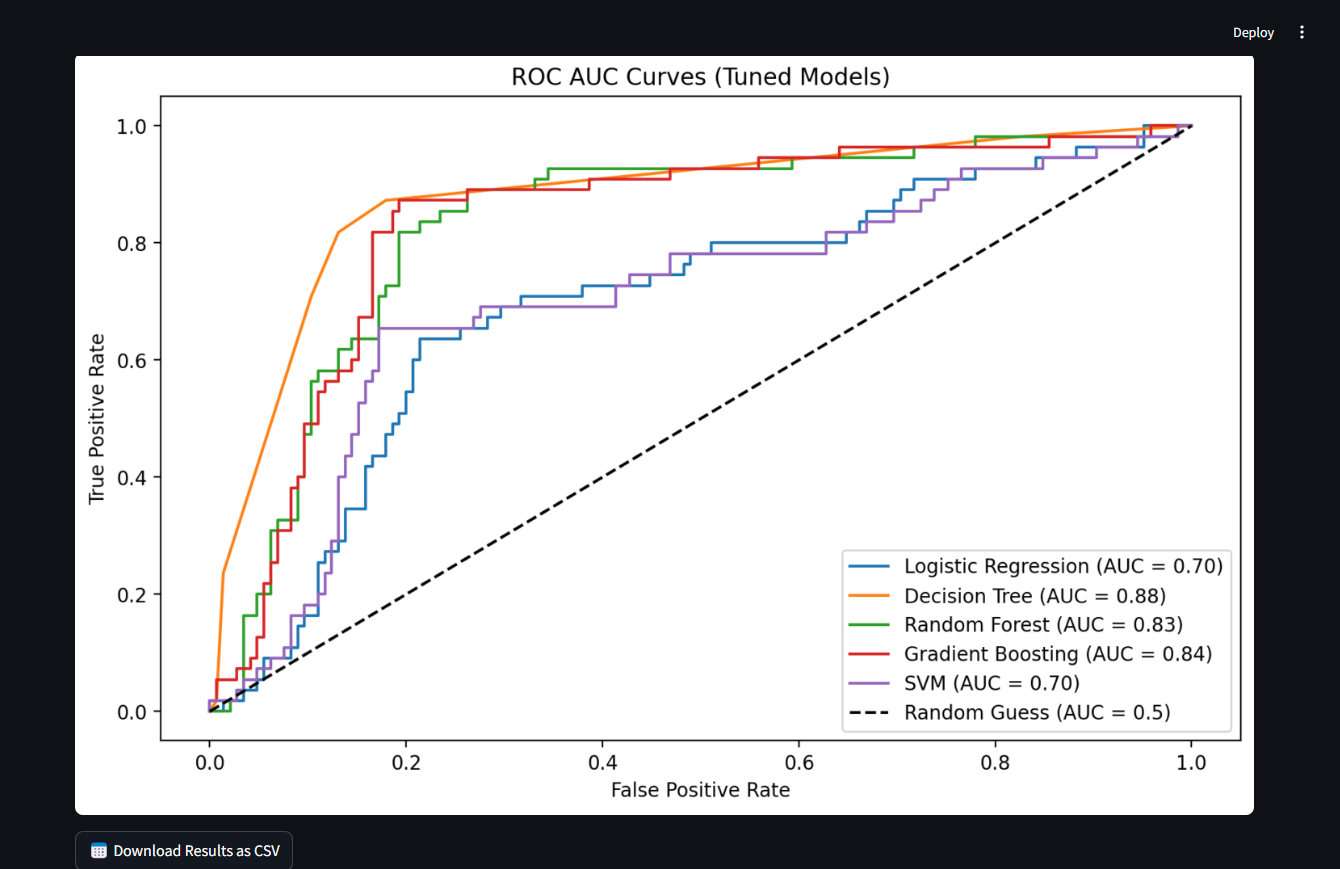